<a href="https://colab.research.google.com/github/atharvakarnik/DataScience/blob/master/classification_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [3]:
#Downloading the dataset

data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
pixel_val, targets = data       #pixel_val is 70000*784 array of 70000 images of 28*28 sized data
targets = targets.astype(int)   #Existing dtype of targest is 'string'

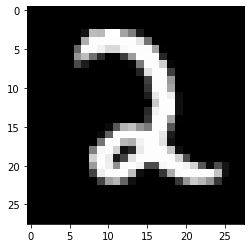

In [4]:
import random as rnd

rnd_img = pixel_val[rnd.randint(1,70000), :].reshape(28, 28)
plt.imshow(rnd_img, cmap='gray')

In [5]:
#Applyin ML Algorithm: t-SNE (t-Distributed Stochastic Neighbour Embedding)

tsne = manifold.TSNE(n_components=2, random_state=42)
trans_data = tsne.fit_transform(pixel_val[:3000, :])        #3000 rows and 2 columns

In [6]:
tsne_df = pd.DataFrame(np.column_stack((trans_data, targets[:3000])),
                       columns=["x", "y", "targets"])
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)
tsne_df.head

<bound method NDFrame.head of               x          y  targets
0     -5.281551 -28.952768        5
1    -26.105896 -68.069321        0
2    -42.503582  35.580391        4
3     38.893967  26.663395        1
4    -14.770573  35.433247        9
...         ...        ...      ...
2995   9.038110  58.850792        7
2996 -29.405334 -60.951775        0
2997  13.466378  47.369007        9
2998  -2.435752   7.983772        1
2999  -4.248264 -13.266910        5

[3000 rows x 3 columns]>

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


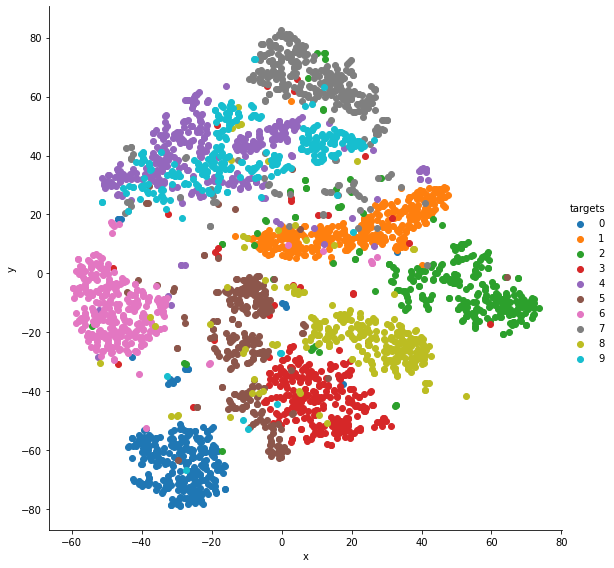

In [7]:
grid = sns.FacetGrid(tsne_df, hue='targets', size=8)
grid.map(plt.scatter, "x", "y").add_legend()

In [8]:
""" RED WINE DATASET """

url = 'https://raw.githubusercontent.com/atharvakarnik/DataScience/master/Datasets/winequality-red.csv'     #Raw GitHub link must be provided
df = pd.read_csv(url)
df.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.3

In [9]:
#Quality Mapping dictionary which maps quality values from 0 to 5
qu_mapping = {3:0,
              4:1,
              5:2,
              6:3,
              7:4,
              8:5}
df.loc[:, "quality"] = df.quality.map(qu_mapping)

In [11]:
#Shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)

#1000 rows for training and 599 for testing
df_train = df.head(1000)
df_test = df.tail(599)

In [16]:
""" Exploring Decision Tree Model """

from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth=3)      #Maximum depth of tree
cols = ['fixed acidity', 'volatile acidity', 'citric acid',
        'residual sugar', 'chlorides', 'free sulfur dioxide',
        'total sulfur dioxide', 'density', 'pH',
        'sulphates', 'alcohol']     #Classes to train upon
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
train_predictions = clf.predict(df_train[cols])       #Generating predictions on training set
test_predictions = clf.predict(df_test[cols])

#Calculating accuracy
train_acc = metrics.accuracy_score(df_train.quality, train_predictions)
test_acc = metrics.accuracy_score(df_test.quality, test_predictions)

In [19]:
print(train_acc)
print(test_acc)

#This accuracy is much low but we can manipulate it by varrying max depth... We'll plot a graph of accuracies w.r.t. max depth

0.57
0.5676126878130217


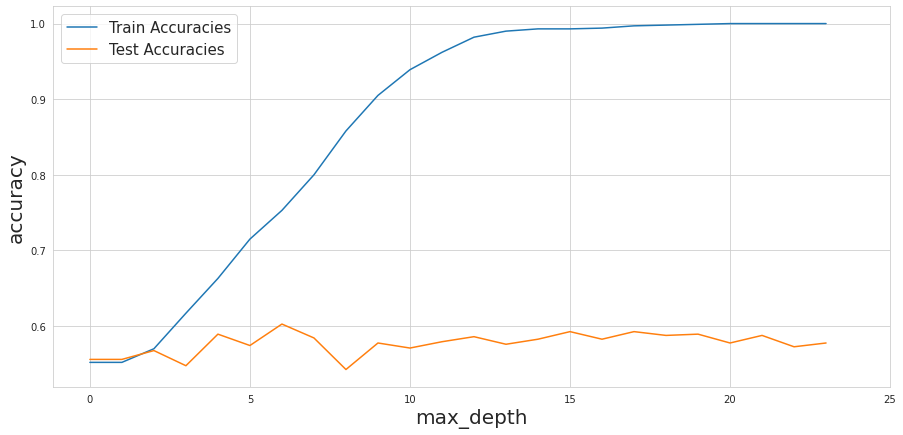

In [24]:
trainAccuracies = []
testAccuracies = []

for depth in range(1,25):
  classifier = tree.DecisionTreeClassifier(max_depth=depth)
  classifier.fit(df_train[cols], df_train.quality)
  
  train_pred = classifier.predict(df_train[cols])
  test_pred = classifier.predict(df_test[cols])

  tr_acc = metrics.accuracy_score(df_train.quality, train_pred)
  ts_acc = metrics.accuracy_score(df_test.quality, test_pred)

  trainAccuracies.append(tr_acc)
  testAccuracies.append(ts_acc)

plt.figure(figsize=(15,7))
sns.set_style("whitegrid")
plt.plot(trainAccuracies, label="Train Accuracies")
plt.plot(testAccuracies, label="Test Accuracies")
plt.legend(loc="upper left", prop={'size':15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()